In [28]:
%matplotlib notebook

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import resize
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

In [4]:
cat_image = imread('https://th.bing.com/th/id/R.1ea9daf6a11d589ee3653df7668a9d49?rik=vi5JseVWx%2b454w&pid=ImgRaw&r=0')

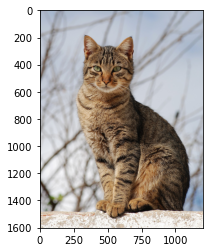

In [5]:
plt.imshow(cat_image)
plt.show()

In [6]:
cat_image.shape

(1602, 1200, 3)

In [11]:
cat_image_resized = resize(cat_image, (1068 //2, 800 // 2))

In [12]:
cat_image.reshape(-1, 3).shape

(1922400, 3)

In [18]:
cat_image_for_modelling = cat_image_resized.reshape(-1, 3)

In [23]:
cluster_model = KMeans(5)
clusters = cluster_model.fit_predict(cat_image_for_modelling)

In [24]:
cluster_model.cluster_centers_

array([[0.71227351, 0.72604331, 0.75542982],
       [0.21104909, 0.15341123, 0.11078296],
       [0.65038798, 0.56991618, 0.48018559],
       [0.83824274, 0.8441918 , 0.8579165 ],
       [0.4714424 , 0.35950972, 0.26146484]])

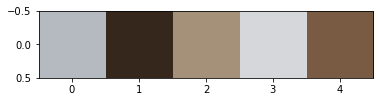

In [25]:
plt.imshow(cluster_model.cluster_centers_.reshape(1, 5, 3))

In [27]:
pd.Series(clusters).groupby(clusters).size() / len(clusters)

0    0.363287
1    0.142402
2    0.134237
3    0.230112
4    0.129963
dtype: float64

<IPython.core.display.Javascript object>


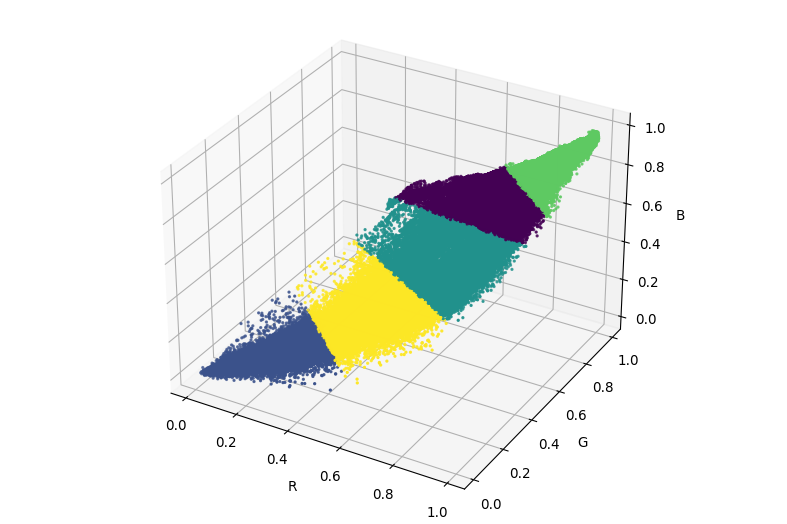

In [36]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(cat_image_for_modelling[:, 0], cat_image_for_modelling[:, 1], cat_image_for_modelling[:, 2], s = 2, c = clusters)

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.show()